___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [85]:
# IMPORTS HERE
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [86]:
# CODE HERE
df = pd.read_csv('../Data/Miles_Traveled.csv', index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [87]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [88]:
# CODE HERE
df.columns = ['Value']

**TASK: Plot out the time series**

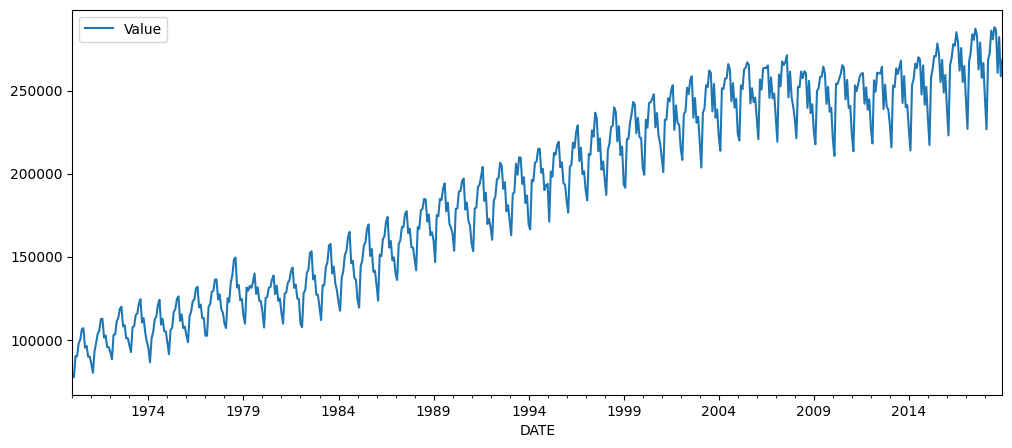

In [89]:
# CODE HERE
df.plot(figsize=(12,5));

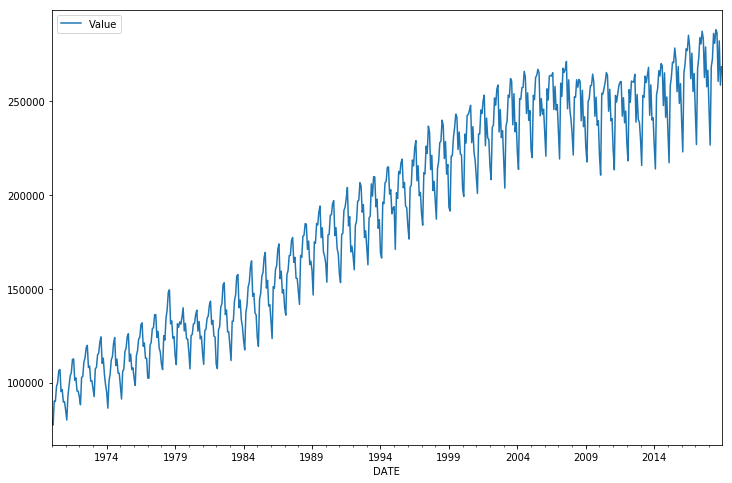

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

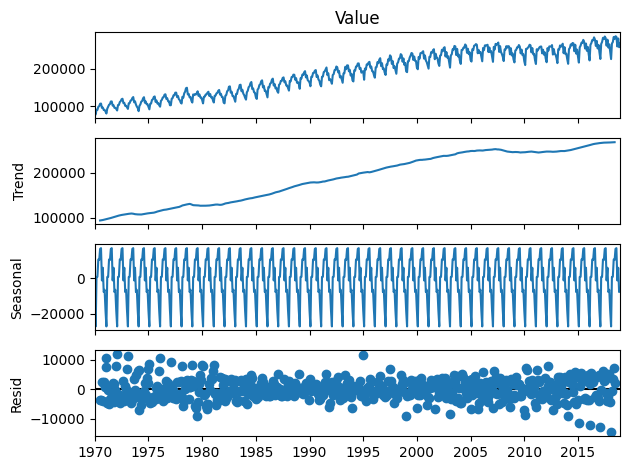

In [90]:
# CODE HERE
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Value'])
results.plot();

<Axes: xlabel='DATE'>

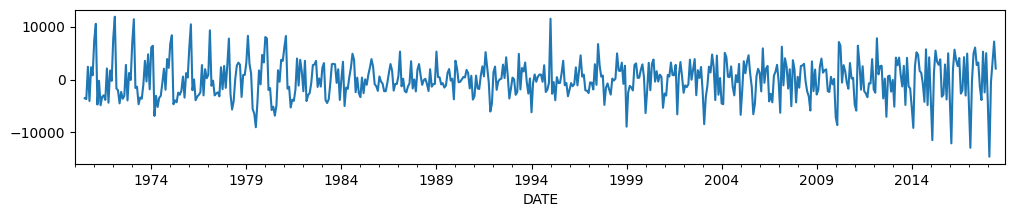

In [47]:
results.resid.plot(figsize=(12,2))

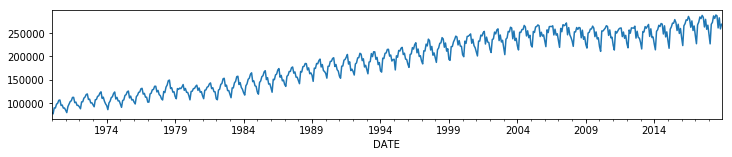

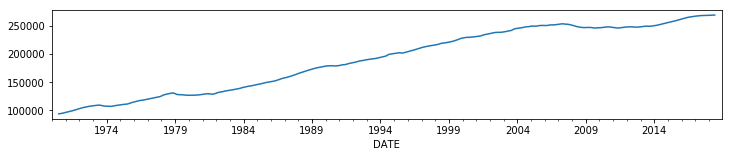

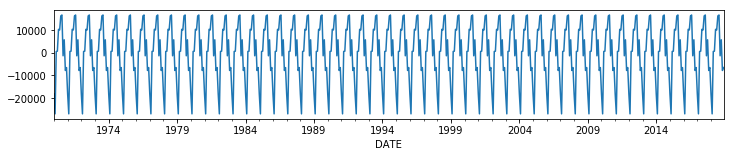

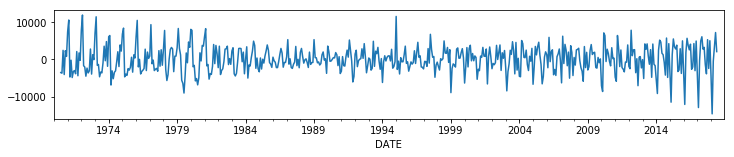

## Train Test Split

**TASK: Figure out the length of the data set**

In [91]:
# CODE HERE
len(df)

588

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [92]:
588-12

576

In [93]:
# CODE HERE
train = df.iloc[:576]
test = df.iloc[576:]

In [94]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [95]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
scaler.fit(train) # find the max value in the train data

MinMaxScaler()

MinMaxScaler(copy=True, feature_range=(0, 1))

In [98]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [100]:
#CODE HERE
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


# Let's redefine to get 12 months back and then predict the next month out
n_input = 24
n_features = 1 #only 1 X for time series data
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.0130109  0.         0.06089061 0.05961858 0.09780801 0.10763646
 0.13792216 0.14067108 0.08485905 0.08992334 0.05832273 0.0594042
 0.03760821 0.01274887 0.07399679 0.09844641 0.12488268 0.13335334
 0.16685961 0.16769811 0.11361547 0.11949919 0.08629306 0.0861025 ]
Predict this y: 
 [[0.07157184]]


In [101]:
X.shape

(1, 24, 1)

Using TensorFlow backend.


### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [103]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/Users/yingliu/Desktop/self-dev/time-series/notebooks/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 150)            │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [104]:
# CODE HERE
model.fit(generator, epochs=30)

Epoch 1/30
 35/552 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1054

/Users/yingliu/Desktop/self-dev/time-series/notebooks/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


552/552 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0221
Epoch 2/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0082
Epoch 3/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0054
Epoch 4/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0053
Epoch 5/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0049
Epoch 6/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0030
Epoch 7/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0023
Epoch 8/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0023
Epoch 9/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0021
Epoch 10/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0018
Epoch 11/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0017
Epoch 12/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0022
Epoch 13/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0015
Epoch 14/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014
Epoch 15/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014


Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

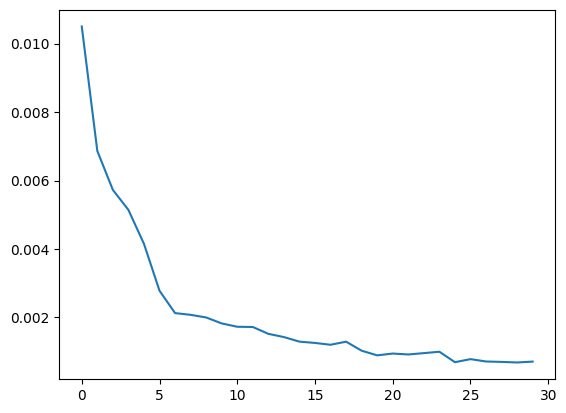

In [105]:
# CODE HERE
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

dict_keys(['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [107]:
# CODE HERE
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

**TASK: Generate predictions into the same time stamps as the test set**

In [108]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) 
    #axis means the location of the shape, we have three locations: 0,1,2 in this case. We want to replace the middle shape so it is 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [109]:
test_predictions

[array([0.81441337], dtype=float32),
 array([0.7534032], dtype=float32),
 array([0.92898285], dtype=float32),
 array([0.9537843], dtype=float32),
 array([0.98882794], dtype=float32),
 array([0.99635935], dtype=float32),
 array([1.0202488], dtype=float32),
 array([0.9979374], dtype=float32),
 array([0.9353597], dtype=float32),
 array([0.9638887], dtype=float32),
 array([0.89328057], dtype=float32),
 array([0.9059689], dtype=float32)]

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [110]:
#CODE HERE
true_predictions = scaler.inverse_transform(test_predictions)

In [111]:
true_predictions

array([[248388.1805039 ],
       [235582.08231211],
       [272436.43001425],
       [277642.27562052],
       [284997.97423196],
       [286578.82356691],
       [291593.2372216 ],
       [286910.05426544],
       [273774.93983531],
       [279763.20302135],
       [264942.48402911],
       [267605.77902246]])

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [112]:
# CODE HERE
test['Predictions'] = true_predictions
test

/var/folders/pf/0w_5tqzd3fq9q1cjhm4hs7k40000gn/T/ipykernel_79983/76749828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


,Value,Predictions
DATE,,
2018-01-01,245695.0,248388.180504
2018-02-01,226660.0,235582.082312
2018-03-01,268480.0,272436.430014
2018-04-01,272475.0,277642.275621
2018-05-01,286164.0,284997.974232
2018-06-01,280877.0,286578.823567
2018-07-01,288145.0,291593.237222
2018-08-01,286608.0,286910.054265
2018-09-01,260595.0,273774.939835


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

<Axes: xlabel='DATE'>

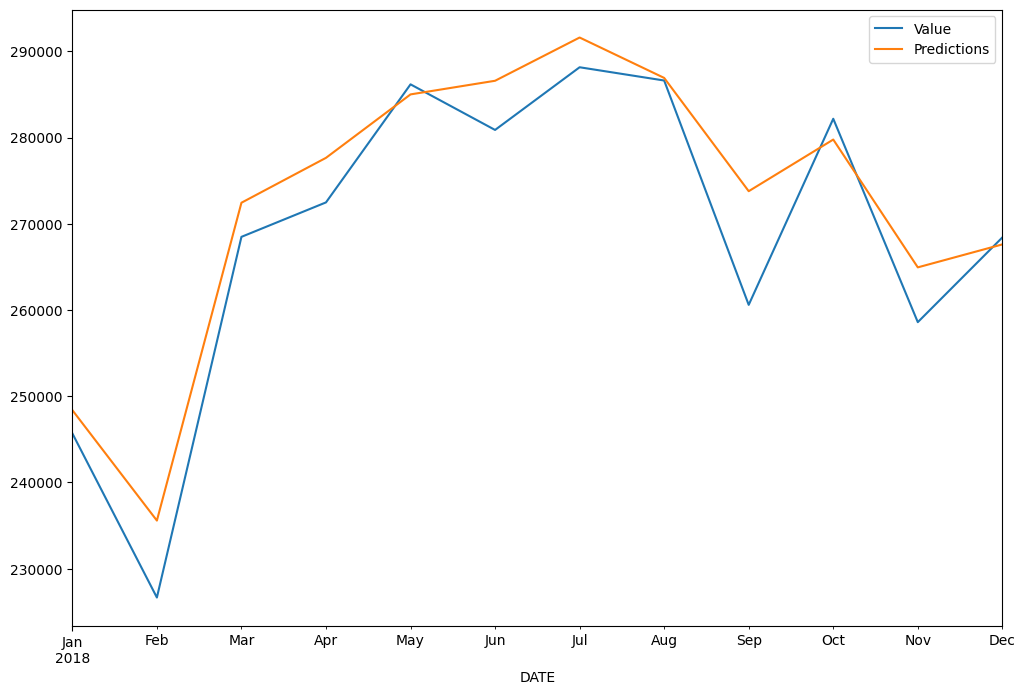

In [113]:
# CODE HERE
test.plot(figsize=(12,8))

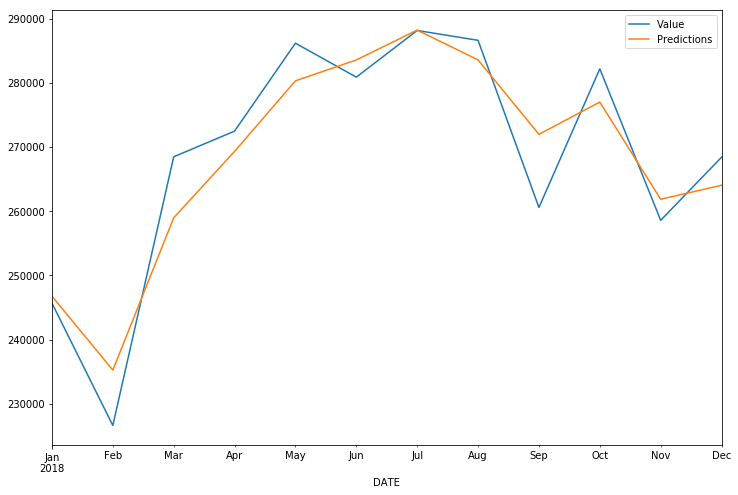

# Saving Models

**TASK: Optional, Save your model!**

In [114]:
model.save('my_rnn_model_exercise.h5')